Trabajarás con un conjunto de indicadores correspondientes a las comunidades  de España que se encuentran en el dataset **archivo.csv**
Se detallan las características a continuación :

* tasainm: tasa bruta de inmigración (personas/mil habitantes)
* tasaem: tasa bruta de emigración (personas/mil habitantes)
* tasaact: tasa actividad (activos/p.total)
* tasaempleo: tasa de empleo (ocupados/p.total)
* tasaparo: tasa de paro (parados/activos)
* ipc: Indice Precio Consumidor base 2016
*pibpc: PIB a precios corrientes por individuo


Con esta información vamos a agrupar las comunidades autónomas, incluyendo las ciudades autónomas de Ceuta y Melilla, con una situación similar. En concreto, queremos identificar grupos de comunidades autónomas (conglomerados) que tengan un comportamiento similar en los indicadores anteriores. 



# Parte 1: Tareas de análisis de datos

A continuación deberás presentar código con su correspondiente interpretación, de tal manera que se obtenga información inicial de los datos : Tamaño de los datos a tratar, tipos de datos, analítica descriptiva, datos nulos, datos atipicos y cualquier otro análisis que estimes conveniente.

tareas de análisis esperadas : entre 5 a 7
Gráficos solicitados: Visualización de valores atipicos y correlación 

importacion librerias necesarias para graficar y trabajar con kmeans

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler


se sube el data set mediante github y también nos dirá la cantidad de filas presentes en el data set, de tal manera de conocer la cantidad de muestras

In [ ]:

# Cargue los CSV, aquí
url = 'https://raw.githubusercontent.com/crosbostol/Especialidad2/main/archivo.csv'
data= pd.read_csv(url, sep=";")
print("el data set tiene", len(data), "filas")
data.head()
#Se carga el data set através de github, plataforma de repositorios y donde se aloja el archivo .csv necesario para la el analisis

el data set tiene 19 filas


,tasainm,tasaem,tasaact,tasaemp,tasaparo,ipc,pibpc
0,5.119569,5.750006,59.35,39.03,34.23,100.736,16521.48315
1,8.923154,9.400895,58.68,47.73,18.65,100.981,24646.14319
2,6.237551,7.617976,51.63,40.90,20.78,100.756,19505.31923
3,15.192307,11.927219,63.23,51.29,18.88,100.241,23438.19009
4,7.975230,6.965184,61.55,42.42,31.08,101.041,18758.60508


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tasainm   19 non-null     float64
 1   tasaem    19 non-null     float64
 2   tasaact   19 non-null     float64
 3   tasaemp   19 non-null     float64
 4   tasaparo  19 non-null     float64
 5   ipc       19 non-null     float64
 6   pibpc     19 non-null     float64
dtypes: float64(7)
memory usage: 1.2 KB


a traves de data.info() podemos decir que el data set cuenta con 19 filas, 6 columnas y todos los datos de las columnas son de tipo float64, por lo que no debemos trabajar con dato tipo object, es decir no debemos trabajar con datos categóricos.
además estas columnas no presentan datos nulos

In [ ]:
data.describe()

,tasainm,tasaem,tasaact,tasaemp,tasaparo,ipc,pibpc
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,10.267073,10.733488,58.613158,45.007895,23.207368,100.821737,21479.461169
std,5.645424,6.148390,3.427301,4.487955,6.093533,0.359827,4623.727424
min,4.663007,5.084221,51.630000,38.870000,14.920000,100.113000,15223.917540
25%,7.316868,7.051369,55.905000,41.535000,18.535000,100.678000,18218.072810
50%,8.901316,9.002980,58.960000,44.430000,20.780000,100.829000,19663.660060
75%,11.663274,11.285902,60.950000,48.600000,29.010000,101.032500,24477.609960
max,27.724255,26.379523,64.820000,53.150000,34.230000,101.492000,30637.714340


con data.describe() podemos observar como se comportan analiticamente las columnas de nuestro dataset, podemos observar que todas las columnas cuentas con 19 datos, podemos ver el promedio de los datos y podemos observar que hay mucha distancia entre los valores de diversas columnas, por lo que deberiamos normalizar nuestros datos, vemos la desviacion estandar entre columnas y 
apreciar que tan grande es como en el caso del pibpc, también podemos ver los datos minimos y máximo de cada columna, los cuales podrían valores atipicos o outliers, finalmente tenemos primer, segundo y tercer cuartil de nuestro data set, el cual nos muestra los valores que toman del 25% hacia abajo, el 50% hacia abajo y finalmente el 75% de los datos.


In [ ]:
data.isnull().sum()

tasainm     0
tasaem      0
tasaact     0
tasaemp     0
tasaparo    0
ipc         0
pibpc       0
dtype: int64

para conocer la cantidad de datos nulos en nuestro data set, ejecutamos el comando data.isnull().sum(), y podemos apreciar que nuestro data no presenta dato nulos en ninguna de sus columnas y filas, por lo que no deberemos trabajar en asignar valores nuevos a los que sean nulos o vacios

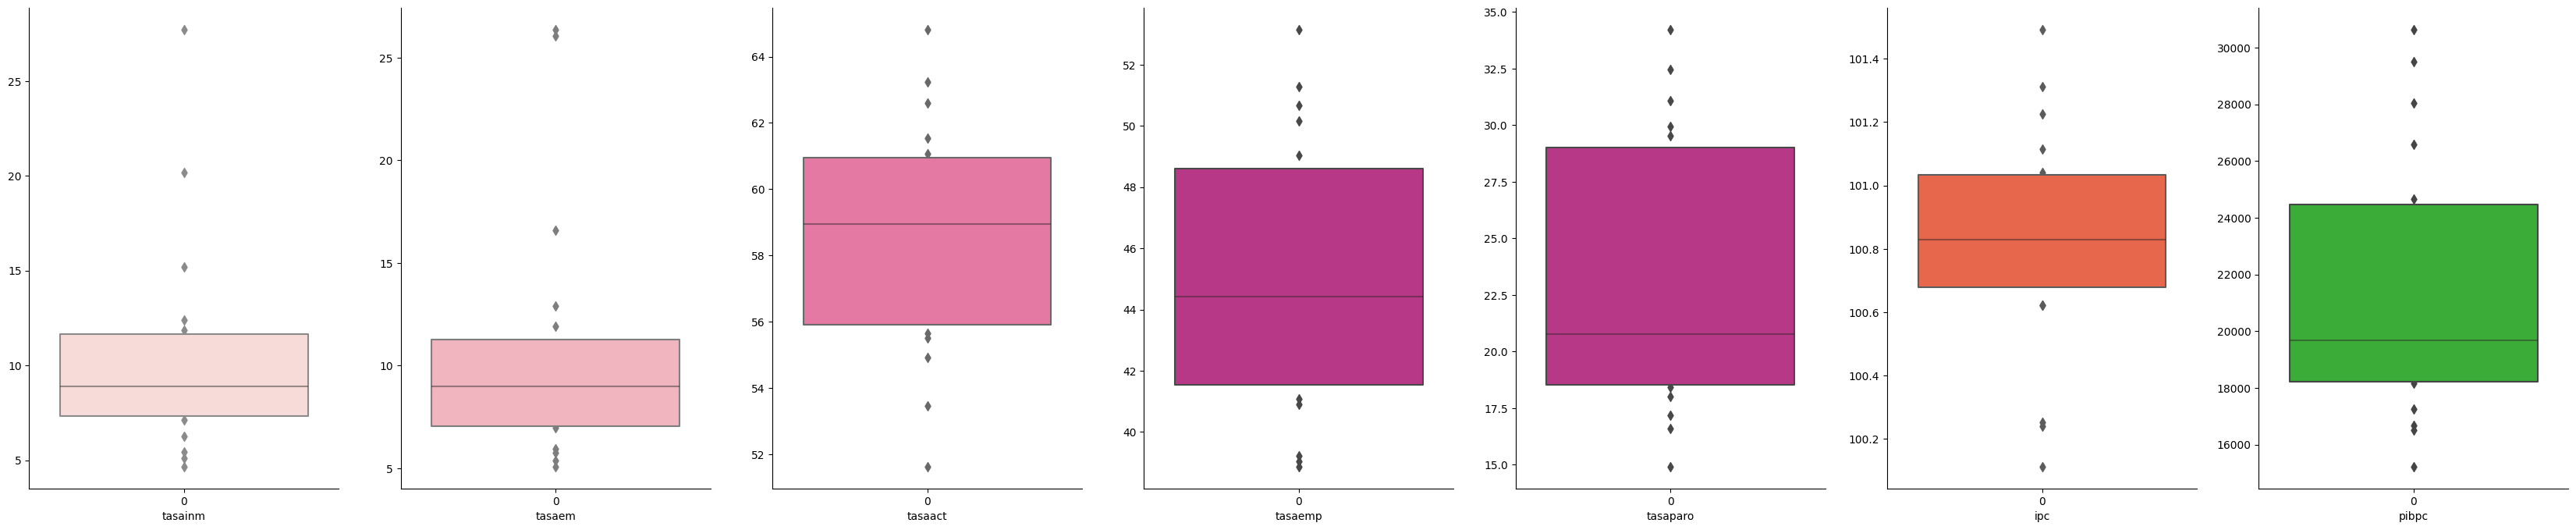

In [ ]:
#set matplotlib parameters
mp.rc_file_defaults()
rc = {'axes.facecolor':'white','grid.color': '.8',}
plt.rcParams.update(rc)

#set seaborn color palette
sns.set_palette(sns.color_palette("Set2", 6))
palette = ["#fcd7d3","#faabb8","#f667a0","#cd238e","#cd238e","#FF5733","#2ABF26"]

#examine the boxplots of different features
features= ["tasainm", "tasaem", "tasaact", "tasaemp", "tasaparo","ipc","pibpc"]

#create plots
fig, axs = plt.subplots(ncols=len(features),figsize=(6*len(features),8))
for i in range(len(features)):
  sns.boxenplot(data=data[features[i]],
                showfliers=True,
                ax=axs[i],
                palette=[palette[i]]
                ).set(xlabel=features[i])
  sns.despine()

Se grafica mediante grafico de caja cada una de las columnas, de tal manera que se pueda ver los datos outliers, o que estan fuera de rango, ya sean valores máximo o minimos, podemos observar que todos los gráficos presentan valores atipicos, por ejemplo en nuestro grafico de ipc, la media estan entre 22000 y un valor menor a 26000, sin embargo hay outliers que son mayores a 30000 y menores a 16000, y son estos datos lo que debemos limpiar. esta situación se repite para todos los gráficos de caja.

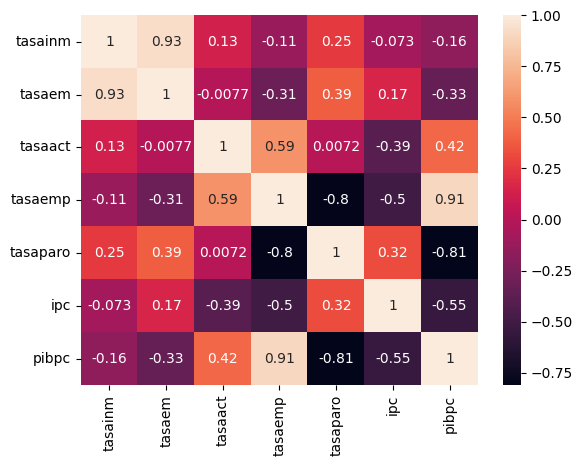

In [ ]:
hm = sns.heatmap(data.corr(), annot = True)
hm.set(xlabel='', ylabel='', title = "")
plt.show()

Anteriormente se muestra nuestro mapa de correlacion o de calor con el data set original, del cual podemos apreciar valores altamente correlacionados, como por ejemplo tasa de empleo con pibpc, o tasa de emigracion con tasa de inmigración, estas son unas columnas candidatas para hacer limpieza o dropearlas, pues serán dato redudantes y que nos pueden influciar de manera negativa el proceso de clustering 

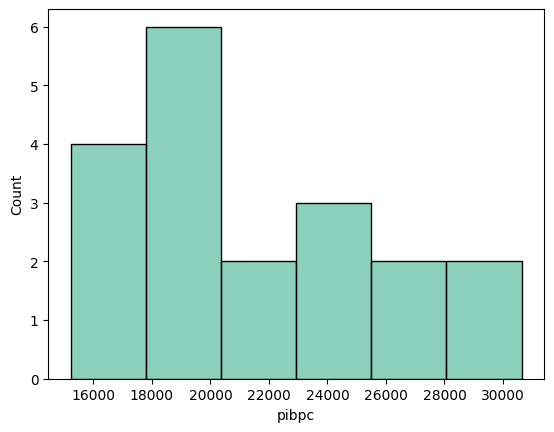

In [ ]:
sns.histplot(data=data, x="pibpc")

Anteriormente se graficó un histograma, de tal manera que en el eje x estan los rangos del pibpc, y en el eje y, el conteo de personas que están en ese rango, por lo que podmeos inferir, en un rango de pibpc de [18000,20000] es donde se encuentra la mayoría de las personas, mientras que existen otros rangos en donde encuentra menos gente.

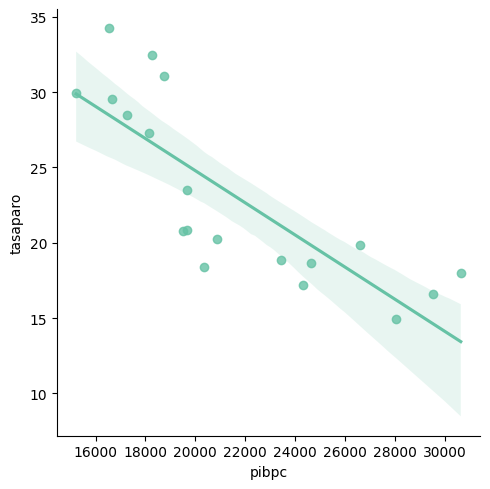

In [ ]:
g = sns.lmplot(x="pibpc", y="tasaparo",  data=data)


Anteriormente graficamos el pibpc y la tasaparo, en eje x e y respectivamente, de lo anterior podemos inferir que a una menor tasa de paso, mayor será el pibpc de la comunidad española, esto tiene sentido, ya que anteriormente hicimos un gráfico de correlación y este muestra que tasaparo y pibpc tienne una correlacion de -0,81, es decir estan fuertemente correlacionados de manera inversa.

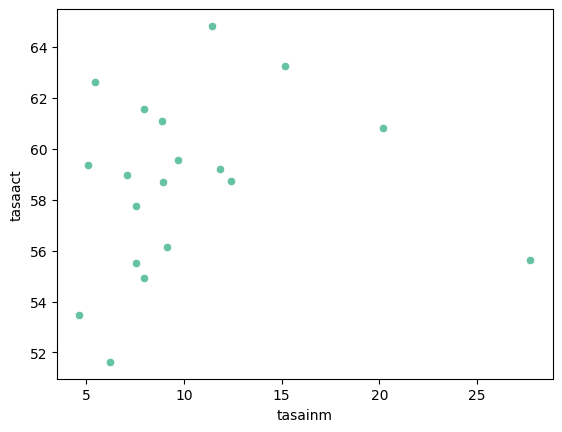

In [ ]:
sns.scatterplot(data=data, x="tasainm", y="tasaact")

antes de realizar el gráfico podriamos decir que a mayor tasa de inmigración mayor podria ser la tasa de actividad, pues las personas pueden migrar para buscar trabajar, por un ascenso en el trabajo o una nueva oportunidad, pero luego de terminar este gráfico y analizar podemos concluir que no necesariamente son directamente proporcionales, ya que podemos ver que una mayor tasa de inmigracion no es mayor la tasa de actividad en aquella comunidad, esto podría ser por diversos motivos, como gente que va de retiro a esa comunidad, gente que toma vacaciones ahí y se quedó por mayor tiempo, etc.
pues en el gráfico podemos ver que la mayor tasa de actividad no esta con la mayor tasa inmigración, y por otro lado podemos ver tambien que estos puntos se agrupoan en cierto rango de tasa de inmigración o tasa de actividad

# Parte 2: Tareas de preprocesamiento

En esta sección deberás realizar tareas relacionadas con la preparación de los datos para ser utilizados posteriormente en los métodos de aprendizaje no supervisado

Tareas de preprocesamiento esperadas : mínimo 2



Para comenzar nuestro preprocesamiento, debemos recordar nuestro gráfico de correlación y ver el porcentaje de correlación entre columnas, para así dropear aquellas que esten con una correlación muy alta, ya sea directa o inversamente correlacionados para así evitar sesgos. 
No sin antes hacer una copia del data set original para así tener un registro completo

In [ ]:
dataCopia=data.copy()
#drop un-needed columns
data= data.drop(["pibpc"], axis=1)


Con el comando anterior dropeamos de nuestro dataset la columna pibpc, esto debido a información que nos entregaron nuestros graficos anteriores, pibpc era el que el tenia mayor correlacion con otras columnas, ya sea directa o inversamente, también según el gráfico de caja es la columna que mas posee valores atipicos o outliers, lo cual podría provocar una segmentación de los datos, o incluso alterar nuestros clusters. es por estos motivos que se decidió eliminar esta columna

In [ ]:

scaler= StandardScaler()
data_escalada = pd.DataFrame(scaler.fit_transform(data),columns = data.columns)
data_escalada.head()

,tasainm,tasaem,tasaact,tasaemp,tasaparo,ipc
0,-0.936787,-0.832745,0.220883,-1.368486,1.858475,-0.244802
1,-0.244578,-0.222678,0.020037,0.623156,-0.768397,0.454739
2,-0.733327,-0.520605,-2.093342,-0.940397,-0.409267,-0.187696
3,0.896336,0.199474,1.383991,1.438127,-0.729618,-1.658159
4,-0.417089,-0.629687,0.880378,-0.592432,1.327368,0.626055


Como segunda tarea de preprocesamiento hicimos una estandarización de los datos, ya que en nuestro data set original teniamos datos muy dispares, por ejemplo, teniamos la columna de tasainm, el cual solo eran valores de 0 a 100, mientras que la columna ipc presentaba datos superiores a 100 por lo que no cumple con el rango de las otras columnas
finalmente comprobamos que la estandarizacion haya funcionado correctamente

# Parte 3. Agrupación por Kmeans

En esta sección deberás presentar la aplicación de la técnica de creación de clusters utilizando el algoritmo kmeans

Agregar un texto descriptivo para explicar los resultados obtenidos en este análisis

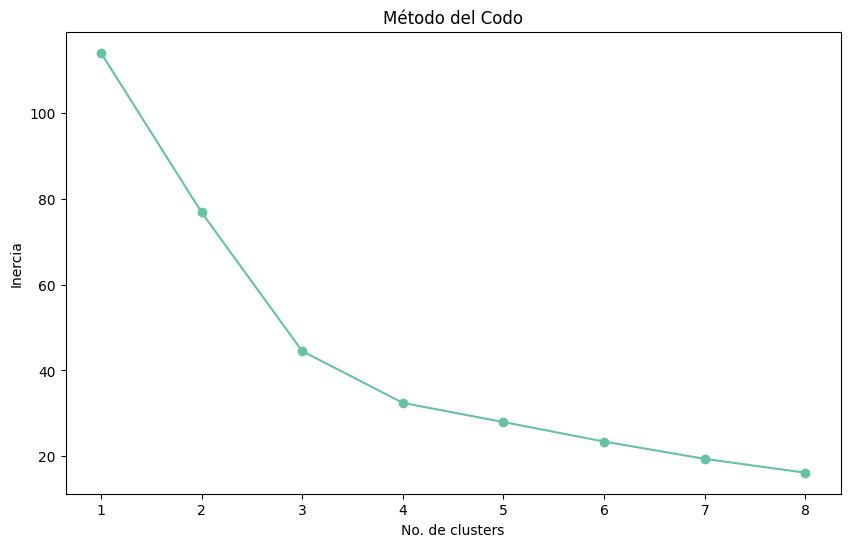

In [ ]:
X = data_escalada.copy()
inercia = [] 
for i in range(1, 9):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    algoritmo.fit(X)
    #Para cada K, se calcula la suma total del cuadrado dentro del clúster
    inercia.append(algoritmo.inertia_)

#Se traza la curva de la suma de errores cuadráticos 
plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 9)), inercia, marker='o')
plt.show()

Gracias al gráfico del codo anteriormente creado, podemos definir que k tendrá asumirá un valor de 5, puesto que es donde nuestro codo presenta un quiebre y luego la pendiente tiende a estar mas equilibrada y no presenta una pendiente elevada, sino que disminuye lentamente.
Se eligieron 9 puntos para realizar el grafico, dada a la baja cantidad de filas que presenta el dataset, por lo que un valor mas alto podría significar un problema para la elección de la cantidad de clusters, así mismo si fuesen menos puntos a graficar, dado que no podriamos apreciar clamente cuando se suaviza la pendiente

In [ ]:
k_means = KMeans(n_clusters = 5, init = 'k-means++', 
                   max_iter = 300, n_init = 10)
k_means.fit(X)

KMeans(n_clusters=5)

creamos nuestro algoritmo de kmeans y clustering con la cantidad de clusters que definimos en nuestro paso anterior, recordemos que es 5, adicional a esto debemos entrenar nuestro algoritmo para que sea capaz de predecir a que cluster corresponde la fila del dataset

In [ ]:
dataCopia["Prediccion"]=k_means.labels_
dataCopia.head()

,tasainm,tasaem,tasaact,tasaemp,tasaparo,ipc,pibpc,Prediccion
0,5.119569,5.750006,59.35,39.03,34.23,100.736,16521.48315,0
1,8.923154,9.400895,58.68,47.73,18.65,100.981,24646.14319,2
2,6.237551,7.617976,51.63,40.90,20.78,100.756,19505.31923,2
3,15.192307,11.927219,63.23,51.29,18.88,100.241,23438.19009,1
4,7.975230,6.965184,61.55,42.42,31.08,101.041,18758.60508,0


Agreamos una columna nueva a nuestro dataset original(que anteriormente copiamos en dataCopia), la cual será la predicción que llevamos a cabo y que nos predijo nuestro algoritmo entrenado de Kmeans

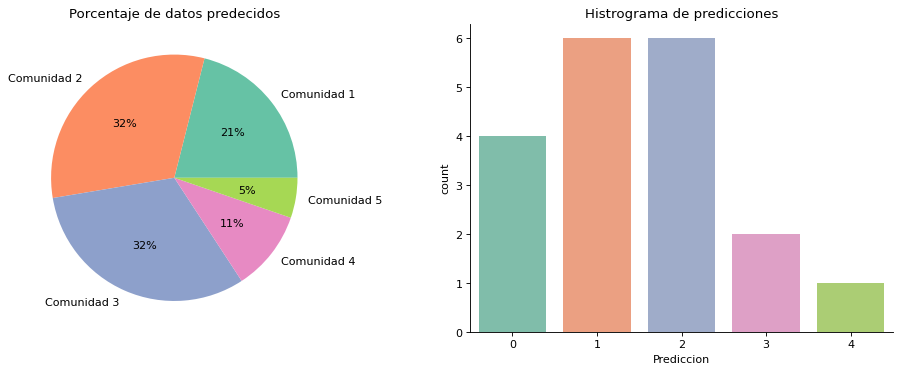

In [ ]:
#defimos como agruparemos nuestros datos predecidos
grupos = ['Comunidad 1', 'Comunidad 2', 'Comunidad 3',"Comunidad 4","Comunidad 5"]
repetidos= []

#contar repetidos para saber así cuantos están en cada grupo
for i in range(5):
  repetidos.append(len(dataCopia[dataCopia["Prediccion"]==i]))

plt.figure(figsize=(15, 5), dpi=80)
plt.rcParams.update({'axes.grid': False})

#grafico de torta
ax1 = plt.subplot2grid((1,2),(0,0))
ax1.set_title("Porcentaje de datos predecidos")
plt.pie(repetidos, labels = grupos, autopct='%.0f%%')

#histograma
ax1 = plt.subplot2grid((1,2), (0, 1))
ax1.set_title("Histrograma de predicciones")
sns.countplot(x=dataCopia["Prediccion"], alpha=.9, ax=ax1)
sns.despine()

plt.show()

Para finalizar nuestro algoritmo de Kmeans y su analisis, hablaremos acerca de los gráficos anteriores, y podemos ver como nuestro algortimo predijo a cual de las 5 comunidades (según valor de k) correspondian nuestros datos, por lo que podemos decir que un 26% pertenece a Comunidad 1, un 21% a Comunidad 2, un 32% pertenece a Comunidad 3,un 11% Pertenece a Comunidad 4 y un 5% pertenece a la comunidad 5. Esto en numeros se traduce, segun nuestro grafico de barras que, nuestras 4 comunidades de conforman de 4, 6, 6, 2, 1 personas a las  Comunidades 1, 2, 3, 4 y 5 respectivamente

# Parte 4. Agrupamiento jerarquico

En esta sección deberás presentar la aplicación de la técnica de creación de agrupaciones mediante agrupamiento jerarquico aglomerativo

Agregar un texto descriptivo para explicar los resultados obtenidos en este análisis

Para llevar a cabo nuestra predicciones mediante el metodo de agrupamiento jerarquico, deberemos realizar un dendograma, debido a que ya realizamos el preprocesamiento de la información y ya escalamos los datos, gracias a eso esto será un poco mas sencillo, solo queda importar una nueva libreria de python, scipy.cluster.hierarchy

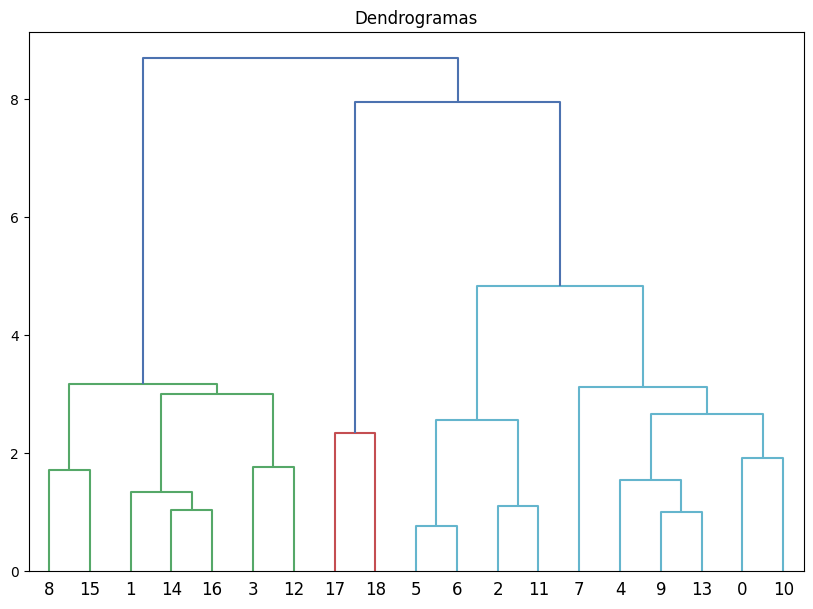

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrogramas") 
dendrograma = shc.dendrogram(shc.linkage(X, method = 'ward'))

Gracias al dendograma anterior, podemos ver la cantidad de cluster que sean llevabado a cabo gráficamente, acontinuación queda elegir la cantidad de clusters mediante el trazado de una linea horizontal (que no calce con las lineas horizontales de los clusters) y luego contar cuantas lineas verticales corta, cada uno de estos cortes sería 1 cluster.
Es importante destacar que el dendograma se realizado mediante el metodo ward,el cual se trata de un procedimiento general donde el criterio para la elección del par de clusters a mezclar en cada paso se basa en el valor óptimo de una función objetivo. y esto es importante dado que este metodo de enlace nos definirá el metodo de distancia que deberemos usar. Trazaremos nuestra linea en y=4, lo cual nos dará 4 clusters, al igual que en kmeans

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agglomerative_clustering = AgglomerativeClustering(n_clusters = 4, 
                                    affinity='euclidean', linkage='ward')

en nuestro codigo anterior importamos de sklearn.cluster, AgglomerativeClustering, para poder acceder algoritmo de cluster aglomerativo, luego, nuestro algoritmo volverá a ser con enlace tipo ward, al igual que el gráfico, así tenemos certeza que lo que graficamos corresponde a nuestro algoritmo, y ya que tenemos enlace ward, debemos usar affinity o distancia tipo euclidiana(esto es mandatorio). Además se trabajó con 4 clusters, dado a que fue lo que se concluyó con el dendograma y la linea horizontal trazada

---



In [ ]:
dataCopiaAC = data.copy()
agglomerative_clustering.fit(X)

dataCopiaAC["Prediccion"]=agglomerative_clustering.labels_
dataCopiaAC.head()

,tasainm,tasaem,tasaact,tasaemp,tasaparo,ipc,Prediccion
0,5.119569,5.750006,59.35,39.03,34.23,100.736,1
1,8.923154,9.400895,58.68,47.73,18.65,100.981,0
2,6.237551,7.617976,51.63,40.90,20.78,100.756,3
3,15.192307,11.927219,63.23,51.29,18.88,100.241,0
4,7.975230,6.965184,61.55,42.42,31.08,101.041,1


creamos una copia del data set para el algoritmo agglomerative clustering, luego se entrena el algoritmo creado en base a nuestro dataset normalizado, se añade la columna predicción para ver a que comunidad asoció cada dato

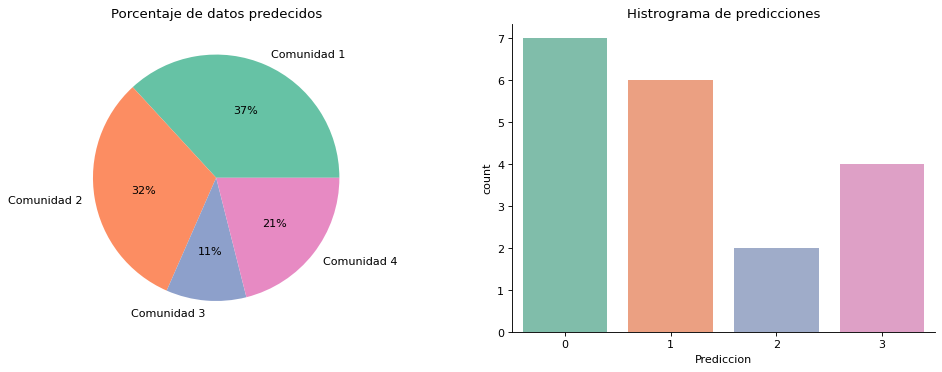

In [ ]:
#defimos como agruparemos nuestros datos predecidos
grupos = ['Comunidad 1', 'Comunidad 2', 'Comunidad 3',"Comunidad 4"]
repetidos= []

#contar repetidos para saber así cuantos están en cada grupo
for i in range(4):
  repetidos.append(len(dataCopiaAC[dataCopiaAC["Prediccion"]==i]))

plt.figure(figsize=(15, 5), dpi=80)
plt.rcParams.update({'axes.grid': False})

#grafico de torta
colors=["#2ABF26","#BFB826","#FF5900","#FF00E0"] 
ax1 = plt.subplot2grid((1,2),(0,0))
ax1.set_title("Porcentaje de datos predecidos")
plt.pie(repetidos, labels = grupos, autopct='%.0f%%')

#histograma
ax1 = plt.subplot2grid((1,2), (0, 1))
ax1.set_title("Histrograma de predicciones")
sns.countplot(x=dataCopiaAC["Prediccion"], alpha=.9, ax=ax1)
sns.despine()

plt.show()

Luego de gráficar la predicción realizada por nuestro algoritmo, podemos concluir en que un 37% es parte de la comunidad 1, un 32% de la comunidad 2, un 11% de la comunidad 3 y un 21% de la comunidad 4, lo cual se traduce en que 7 personas son de la comunidad 1, 6 personas de la comunidad 2, 2 personas de la comunidad 3 y 4 personas a la comunidad 4.

# Parte 5. Interpretación 

Contrastar los resultados obtenidos con ambos métodos y comentar su interpretación



Para finalizar realizaremos una comparativa entre los dos tipos de prediccion, mediante el algoritmo Kmeans y el algoritmo Agglomerative Clustering, porque, aunque los dos se encargan de realizan predicciones, ambos tienen parametros distintos y arrojan información diferente, por lo que acontinuación procederemos a extraer información de nuestros dataset finales

In [ ]:

dataCopia["Prediccion"].value_counts().sort_index()


0    4
1    6
2    6
3    2
4    1
Name: Prediccion, dtype: int64

In [ ]:
dataCopiaAC["Prediccion"].value_counts().sort_index()

0    7
1    6
2    2
3    4
Name: Prediccion, dtype: int64

Con los dos codgos anteriores, podemos ver como fue que gruparon los algoritmos, primero está la predicción de Kmeans y luego la de Agglomerative clustering.
Estos difieren en como agruparon los datos, y ne la cantidad de clusters que se crearon, 
se adjunta una tabla que verifica esto.


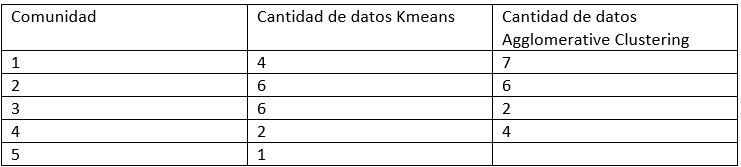

Podemos ver diferencias sustanciales entre ambos algoritmos, en como asocian los datos a los clusters y la cantidad de clusters como tal, pero debemos hacernos la siguiente pregunta.
# ¿Por qué son diferentes?
son diferentes porque ambos predicen de manera diferente, agglomerative clustering,AC de ahora en adelante, tiene tipo de enlace para los datos, así como la distancia de estos.
Por otro lado también el metodo para definir K o la cantidad de cluster, para Kmeans usamos un gráfico de codo, el cual no es del todo exacto puesto que se realiza una interpretación, mientras que en AC tenemos un dendograma, el cual nos da exactamente el numero de cortes según donde se decida trazar la linea horizontal.
Cabe destacar que AC es mas óptimo para dataset con pocos valores, por lo que resulta mas confiable en este caso, mientras que Kmeans es mas útil para datasets grande, no quita que se pueda usar en el presente trabajo.

